In [2]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
cd D:\OneDrive\Lammps\nanoglass\20181116_800K_NPTb+800-300K_NPTb+300K_NVTb_xTen_E-2Aps\data_analyses_2\data_files

D:\OneDrive\Lammps\nanoglass\20181116_800K_NPTb+800-300K_NPTb+300K_NVTb_xTen_E-2Aps\data_analyses_2\data_files


In [6]:
temp = 800
step =200

estrain = step * 0.01 * 0.042
txt_name = 'ZrCuO_NG_%iK_%i.txt'%(temp,step)

In [7]:
# this cell  import the datafile and select the region from the origin model for x-distribution analysis
df00 = pd.DataFrame(pd.read_csv(txt_name, sep='\t'))
y_lower = (df00.PositionY.max()+df00.PositionY.min())*0.5 - (df00.PositionY.max()-df00.PositionY.min())*0.1
y_upper = (df00.PositionY.max()+df00.PositionY.min())*0.5 + (df00.PositionY.max()-df00.PositionY.min())*0.1
df00_y = df00.loc[(df00.PositionY >= y_lower) & (df00.PositionY <= y_upper)].sort_values('PositionY')

<Figure size 360x432 with 0 Axes>

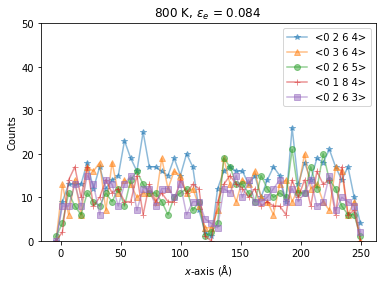

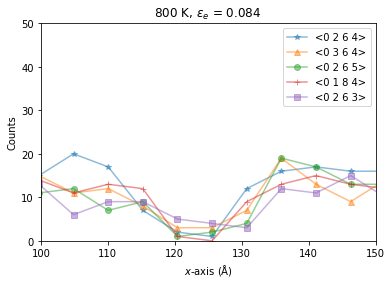

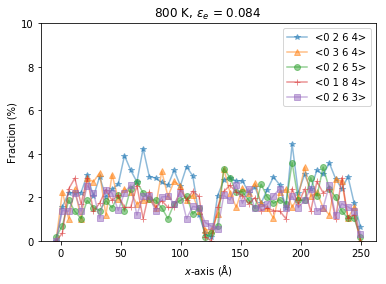

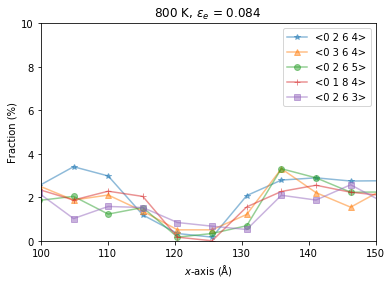

In [11]:
# this cell calculate the voronoi polydedra distribution
bin_num = 50.
quartiles = pd.cut(df00_y.PositionX, bin_num)

vp_x_dist = df00_y.VoronoiIndices.groupby(quartiles).value_counts().unstack().replace(np.nan, 0.)
sum = vp_x_dist.sum(axis=1)
vp_x_dist_fraction = vp_x_dist.div(sum, axis=0)*100

vp_num_rank = pd.Series(df00_y.VoronoiIndices.value_counts())
vp_num_rank[20:] =np.nan
vp_top20 = vp_num_rank.dropna()

vp_x_cor = pd.Series(np.arange(bin_num))
for i in range(len(vp_x_dist.index)):
    vp_x_cor[i] = vp_x_dist.index[i].mid

vp_df02 = vp_x_dist.reset_index().sort_values('PositionX')
vp_df02['x_cor'] =vp_x_cor
vp_df03 = vp_df02.set_index('x_cor').drop('PositionX', axis=1)
vp_df03.to_csv('ZrCuO_NG_%iK_%.3f_vp number distribution.txt'%(temp, estrain))

vp_df02_frac = vp_x_dist_fraction.reset_index().sort_values('PositionX')
vp_df02_frac['x_cor'] = vp_x_cor
vp_df03_frac = vp_df02_frac.set_index('x_cor').drop('PositionX', axis = 1)
vp_df03_frac.to_csv('ZrCuO_NG_%iK_%.3f_vp fraction distribution.txt'%(temp, estrain))

# Plot the global/local distribution diagram of the top five vps
vp_df04 = vp_df03[vp_top20.index[:5]]
vp_df04_frac = vp_df03_frac[vp_top20.index[:5]]

fig = plt.figure(figsize=(5,6))

vp_df04.plot(ylim=(0,50),style=['*-','^-','o-','+-','s-'], title='%i K, $ε_e$ = %.3f'%(temp,estrain), alpha = 0.5)
plt.xlabel('$x$-axis (Å)')
plt.ylabel('Counts')
plt.legend(loc='best')
fig_name = 'ZrCuO_NG_%iK_%.3f_vp number distribution.jpg'%(temp, estrain)
plt.savefig(fig_name,dpi=1200)

vp_df04.plot(xlim=(100,150), ylim=(0,50),style=['*-','^-','o-','+-','s-'], title='%i K, $ε_e$ = %.3f'%(temp,estrain), alpha = 0.5)
plt.xlabel('$x$-axis (Å)')
plt.ylabel('Counts')
plt.legend(loc='best')
fig_name = 'ZrCuO_NG_%iK_%.3f_vp number_local distribution.jpg'%(temp, estrain)
plt.savefig(fig_name,dpi=1200)

vp_df04_frac.plot(ylim=(0,10),style=['*-','^-','o-','+-','s-'], title='%i K, $ε_e$ = %.3f'%(temp,estrain), alpha = 0.5)
plt.xlabel('$x$-axis (Å)')
plt.ylabel('Fraction (%)')
plt.legend(loc='best')
fig_name = 'ZrCuO_NG_%iK_%.3f_vp fraction distribution.jpg'%(temp, estrain)
plt.savefig(fig_name,dpi=1200)

vp_df04_frac.plot(xlim=(100,150), ylim=(0,10),style=['*-','^-','o-','+-','s-'], title='%i K, $ε_e$ = %.3f'%(temp,estrain), alpha = 0.5)
plt.xlabel('$x$-axis (Å)')
plt.ylabel('Fraction (%)')
plt.legend(loc='best')
fig_name = 'ZrCuO_NG_%iK_%.3f_vp fraction_local distribution.jpg'%(temp, estrain)
plt.savefig(fig_name,dpi=1200)

In [8]:
# this cell calculate the global <0 0 12 0> number of each center atom
vp_df_fi = df00.loc[df00.VoronoiIndices == '<0 0 12 0>']
Cu_centered_fi_num = 0
O_centered_fi_num = 0
Zr_centered_fi_num = 0
for type in range(1,4):
    if type == 1: 
        Cu_centered_fi_num = vp_df_fi.loc[vp_df_fi.AtomType == type].shape[0]
    elif type == 2:
        O_centered_fi_num = vp_df_fi.loc[vp_df_fi.AtomType == type].shape[0]
    else:
        Zr_centered_fi_num = vp_df_fi.loc[vp_df_fi.AtomType == type].shape[0]

with open('ZrCuO_NG_%iK_global FI number.txt'%temp,'a+') as f:
    var = 'estrain' +'\t' + 'Cu_centered' +'\t' + 'O_centered' +'\t' + 'Zr_centered'+'\n'
    value = '%.3f\t%i\t%i\t%i\n'%(estrain,Cu_centered_fi_num,O_centered_fi_num,Zr_centered_fi_num)
    if step == 0:
        f.write(var)
        f.write(value)
    else:
        f.write(value)
        

In [27]:
# this cell calculate the global atoms with shear strain equal or greater than 0.2
stz_atoms = df00.loc[df00.ShearStrain >= 0.2]
Cu_in_stz = 0
O_in_stz = 0
Zr_in_stz = 0
atoms_in_stz = stz_atoms.shape[0]

for type in range(1,4):
    if type == 1: 
        Cu_in_stz = stz_atoms.loc[stz_atoms.AtomType == type].shape[0]
        Cu_total = df00.loc[df00.AtomType == type].shape[0]
    elif type == 2:
        O_in_stz = stz_atoms.loc[stz_atoms.AtomType == type].shape[0]
        O_total = df00.loc[df00.AtomType == type].shape[0]
    else:
        Zr_in_stz = stz_atoms.loc[stz_atoms.AtomType == type].shape[0]
        Zr_total = df00.loc[df00.AtomType == type].shape[0]

Cu_frac_in_stz = (Cu_in_stz / atoms_in_stz) * 100
O_frac_in_stz = (O_in_stz / atoms_in_stz) * 100
Zr_frac_in_stz = (Zr_in_stz / atoms_in_stz) * 100

stzed_Cu_frac = (Cu_in_stz / Cu_total) * 100
stzed_O_frac = (O_in_stz / O_total) * 100
stzed_Zr_frac = (Zr_in_stz / Zr_total) * 100

with open('ZrCuO_NG_%iK_stz atoms.txt'%temp,'a+') as f:
    var = 'estrain' +'\t' + 'Cu in STZ'+'\t' + 'O in STZ'+'\t' + 'Zr in STZ'+'\t' + 'STZed Cu'+'\t' + 'STZed O'+'\t' + 'STZed Zr'+'\n'
    value = '%.3f\t%.5f\t%.5f\t%.5f\t%.5f\t%.5f\t%.5f\n'%(estrain, Cu_frac_in_stz, O_frac_in_stz, Zr_frac_in_stz,stzed_Cu_frac, stzed_O_frac, stzed_Zr_frac )
    if step == 0:
        f.write(var)
        f.write(value)
    else:
        f.write(value)

<Figure size 1800x1200 with 0 Axes>

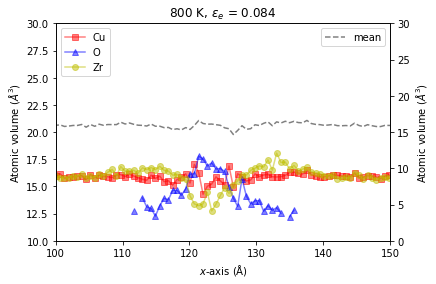

In [12]:
# this cell calculate the atomic volume distribution 
bin_num = 400.
quartiles = pd.cut(df00_y.PositionX, bin_num)

av_x_dist = df00_y.AtomicVolume.groupby([df00_y.AtomType,quartiles]).mean().unstack().T.rename({1:'Cu',2:'O',3:'Zr'},axis=1)
av_x_dist_mean = df00_y.AtomicVolume.groupby(quartiles).mean()
av_x_dist['mean'] = av_x_dist_mean

av_x_cor = pd.Series(np.arange(bin_num))
for i in range(len(av_x_dist.index)):
    av_x_cor[i] = av_x_dist.index[i].mid

av_df01=av_x_dist.reset_index().sort_values('PositionX')

av_df01['x_cor'] =av_x_cor

av_df02=av_df01.set_index('x_cor').drop('PositionX',axis=1)

av_df02.to_csv('ZrCuO_NG_%iK_%.3f_atomic volume distribution.txt'%(temp, estrain))

fig = plt.figure(dpi=1200)

ax = av_df02.plot(secondary_y= ['mean'], xlim=(100,150), ylim=(10,30),style=['rs-','b^-','yo-','k--'], title='%i K, $ε_e$ = %.3f'%(temp,estrain), alpha=0.5,mark_right=False)

ax.set_xlabel('$x$-axis (Å)')
ax.set_ylabel('Atomic volume ($Å^3$)')
ax.right_ax.set_ylabel('Atomic volume ($Å^3$)')
ax.right_ax.set_ylim((0,30))
ax.legend_.remove()
ax.legend(labels = ['Cu','O','Zr'],loc='upper left')
ax.right_ax.legend(labels = ['mean'],loc='upper right')
plt.savefig('ZrCuO_NG_%iK_%.3f_atomic volume distribution.jpg'%(temp, estrain),dpi=1200)

<Figure size 1800x1200 with 0 Axes>

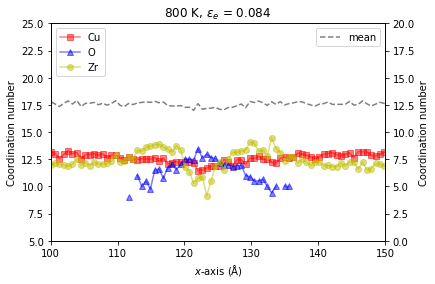

In [13]:
# this cell calculate the coordination number distribution across the center interface
bin_num = 400.
quartiles = pd.cut(df00_y.PositionX, bin_num)

cn_x_dist = df00_y.CoordinationNumber.groupby([df00_y.AtomType, quartiles]).mean().unstack().T.rename({1:'Cu',2:'O',3:'Zr'},axis=1)
cn_x_dist_mean = df00_y.CoordinationNumber.groupby(quartiles).mean()
cn_x_dist['mean'] = cn_x_dist_mean

cn_x_cor = pd.Series(np.arange(bin_num))
for i in range(len(cn_x_dist.index)):
    cn_x_cor[i] = cn_x_dist.index[i].mid

cn_df01=cn_x_dist.reset_index().sort_values('PositionX')
cn_df01['x_cor'] =cn_x_cor
cn_df02=cn_df01.set_index('x_cor').drop('PositionX',axis=1)
cn_df02.to_csv('ZrCuO_NG_%iK_%.3f_coordination number distribution.txt'%(temp, estrain))


fig = plt.figure(dpi=1200)
ax = cn_df02.plot(secondary_y= ['mean'], xlim=(100,150), ylim=(5,25),style=['rs-','b^-','yo-','k--'], title='%i K, $ε_e$ = %.3f'%(temp,estrain), alpha=0.5,mark_right=False)

ax.set_xlabel('$x$-axis (Å)')
ax.set_ylabel('Coordination number')
ax.right_ax.set_ylabel('Coordination number')
ax.right_ax.set_ylim((0,20))
ax.legend_.remove()
ax.legend(labels = ['Cu','O','Zr'],loc='upper left')
ax.right_ax.legend(labels = ['mean'],loc='upper right')
plt.savefig('ZrCuO_NG_%iK_%.3f_coordination number distribution.jpg'%(temp, estrain),dpi=1200)

<Figure size 1800x1200 with 0 Axes>

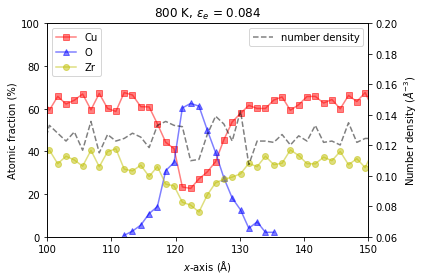

In [14]:
# this cell calculate the element distribution across the center interface
bin_num = 200.
quartiles = pd.cut(df00_y.PositionX, bin_num)

unit_volume = ((df00_y.PositionX.max() - df00_y.PositionX.min()) / bin_num) * (y_upper - y_lower) * (df00_y.PositionZ.max() - df00_y.PositionZ.min())


unit_volume

el_x_dist = df00_y.AtomType.groupby(quartiles).value_counts().unstack().replace(np.nan, 0.).rename(columns={1:'Cu',2:'O',3:'Zr'}).replace(0,np.nan)
el_x_dist['sum'] = el_x_dist.sum(axis =1)
el_x_dist['number density'] = el_x_dist.sum(axis =1) / unit_volume

el_x_dist['Cu'] = el_x_dist.apply(lambda x: x['Cu'] / x['sum'], axis =1)*100
el_x_dist['O'] = el_x_dist.apply(lambda x: x['O'] / x['sum'], axis =1)*100
el_x_dist['Zr'] = el_x_dist.apply(lambda x: x['Zr'] / x['sum'], axis =1)*100
#el_x_dist.drop('sum',axis=1,inplace=True)

el_x_cor = pd.Series(np.arange(bin_num))
for i in range(len(el_x_dist.index)):
    el_x_cor[i] = el_x_dist.index[i].mid

el_df01=el_x_dist.reset_index().sort_values('PositionX')

el_df01['x_cor'] =el_x_cor

el_df02=el_df01.set_index('x_cor').drop(['PositionX','sum'],axis=1)

el_df02.to_csv('ZrCuO_NG_%iK_%.3f_elemental distribution.txt'%(temp, estrain))


plt.figure(dpi=1200)
ax = el_df02.plot(secondary_y=['number density'],xlim=(100,150),ylim=(0,100),style=['rs-','b^-','yo-','k--'], title='%i K, $ε_e$ = %.3f'%(temp,estrain),alpha=0.5,mark_right=False)
ax.set_xlabel('$x$-axis (Å)')
ax.set_ylabel('Atomic fraction (%)')
ax.right_ax.set_ylabel('Number density ($Å^{-3}$)')
ax.right_ax.set_ylim((0.06,0.2))
ax.legend_.remove()
ax.legend(labels = ['Cu','O','Zr'],loc='upper left')
ax.right_ax.legend(labels = ['number density'],loc='upper right')
plt.tight_layout()
plt.savefig('ZrCuO_NG_%iK_%.3f_elemental distribution.jpg'%(temp, estrain),dpi=1200)

In [15]:
# this cell caculate the thickness of the oxide interface
df01_y_O = df00_y.loc[(df00_y.AtomType == 2)&(df00_y.PositionX >= 100) &(df00_y.PositionX <= 150)].sort_values('PositionX')

oxide_thickness = df01_y_O.PositionX.max() - df01_y_O.PositionX.min()

with open('ZrCuO_NG_%iK_oxide interface thickness.txt'%temp,'a+') as f:
    var = 'estrain' +'\t' + 'thickness(angstrom)'+'\n'
    value = '%.3f\t%.5f\n'%(estrain, oxide_thickness)
    if step == 0:
        f.write(var)
        f.write(value)
    else:
        f.write(value)